In [7]:
# Demo Notebook for Interactive Pandas Data Explorer

# --- 1. Imports ---
import pandas as pd
import seaborn as sns
from IPython.display import display
import sys
import os

In [8]:
sys.path.append(os.path.abspath(".."))

from explorer.data_loader import load_csv
from explorer.stats import show_summary
from explorer.visualizations import plot_histograms, plot_correlation_heatmap
from explorer.filters import filter_dataframe

In [9]:
# --- 2. Load Titanic dataset ---
print("Loading Titanic dataset...")
titanic_df = sns.load_dataset("titanic")
print("First 5 rows of Titanic dataset:")
display(titanic_df.head())

Loading Titanic dataset...
First 5 rows of Titanic dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# --- 3. Show summary stats ---
print("\nTitanic Dataset Summary:")
show_summary(titanic_df)


Titanic Dataset Summary:
Shape: (891, 15)
Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Statistics:
           survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.4865


Histograms for Titanic dataset:


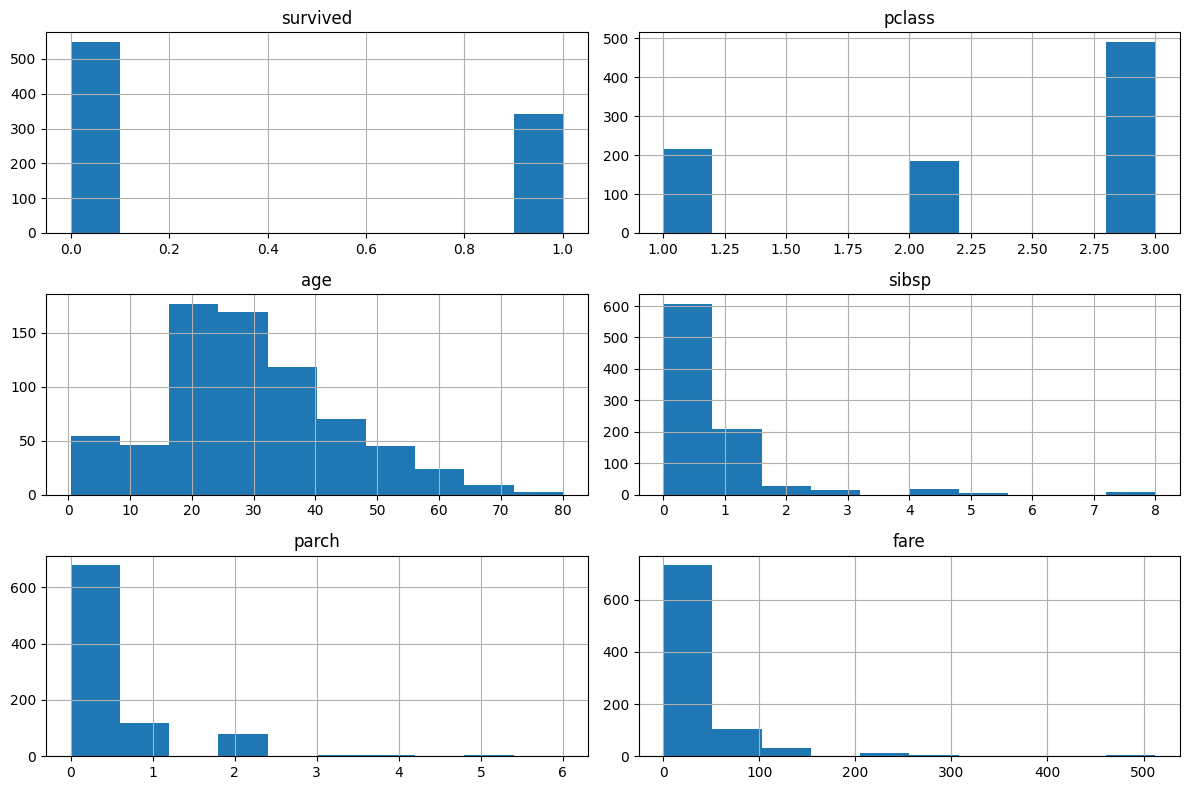

In [11]:
# --- 4. Plot histograms ---
print("\nHistograms for Titanic dataset:")
plot_histograms(titanic_df.select_dtypes(include='number'))


Correlation heatmap for Titanic dataset:


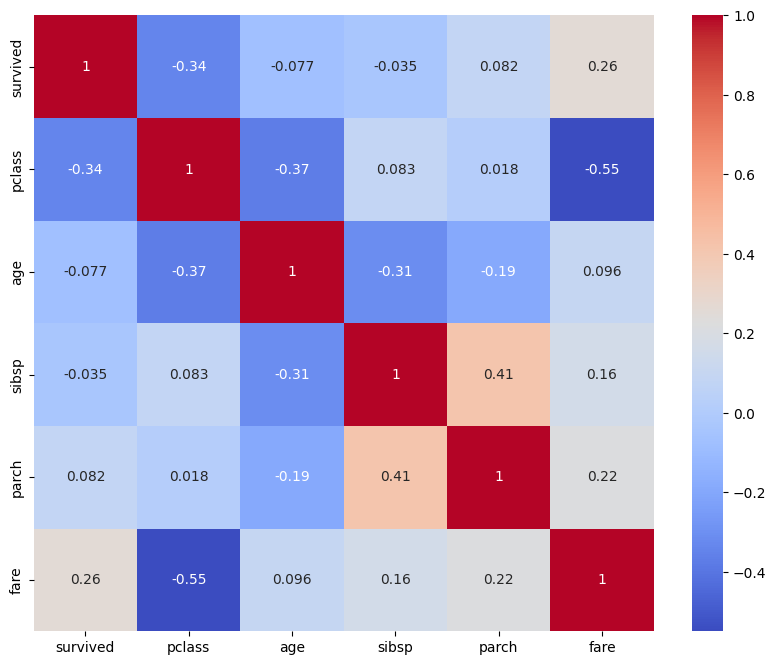

In [12]:
# --- 5. Plot correlation heatmap ---
print("\nCorrelation heatmap for Titanic dataset:")
plot_correlation_heatmap(titanic_df.select_dtypes(include='number'))

In [13]:
# --- 6. Filter Titanic dataset ---
print("\nFiltering Titanic dataset: Age >= 30")
filtered_titanic = filter_dataframe(titanic_df, "age", min_value=30)
display(filtered_titanic.head())


Filtering Titanic dataset: Age >= 30
Filtered DataFrame: 330 rows, 15 columns.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [14]:
# --- 7. Load Iris dataset ---
print("\nLoading Iris dataset...")
iris_df = sns.load_dataset("iris")
print("First 5 rows of Iris dataset:")
display(iris_df.head())


Loading Iris dataset...
First 5 rows of Iris dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# --- 8. Show summary stats ---
print("\nIris Dataset Summary:")
show_summary(iris_df)


Iris Dataset Summary:
Shape: (150, 5)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Statistics:
         sepal_length  sepal_width  petal_length  petal_width species
count     150.000000   150.000000    150.000000   150.000000     150
unique           NaN          NaN           NaN          NaN       3
top              NaN          NaN           NaN          NaN  setosa
freq             NaN          NaN           NaN          NaN      50
mean        5.843333     3.057333      3.758000     1.199333     NaN
std         0.828066     0.435866      1.765298     0.762238     NaN
min         4.300000     2.000000      1.000000     0.100000     NaN
25%         5.100000     2.800000      1.600000     0.300000     NaN
50%         5.800000     3.000000      4.350000     1.300000     NaN
75%         6.400000     3.300000      5.100000     1


Histograms for Iris dataset:


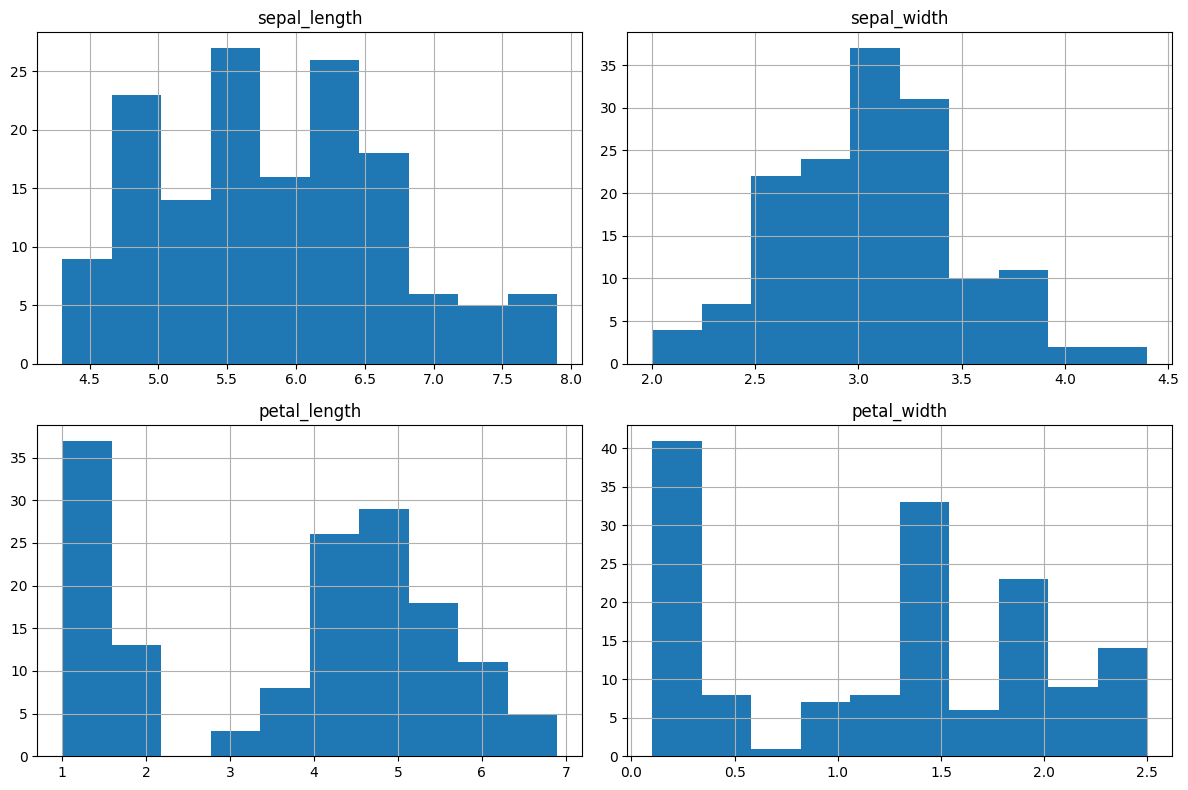

In [16]:
# --- 9. Plot histograms ---
print("\nHistograms for Iris dataset:")
plot_histograms(iris_df.select_dtypes(include='number'))


Correlation heatmap for Iris dataset:


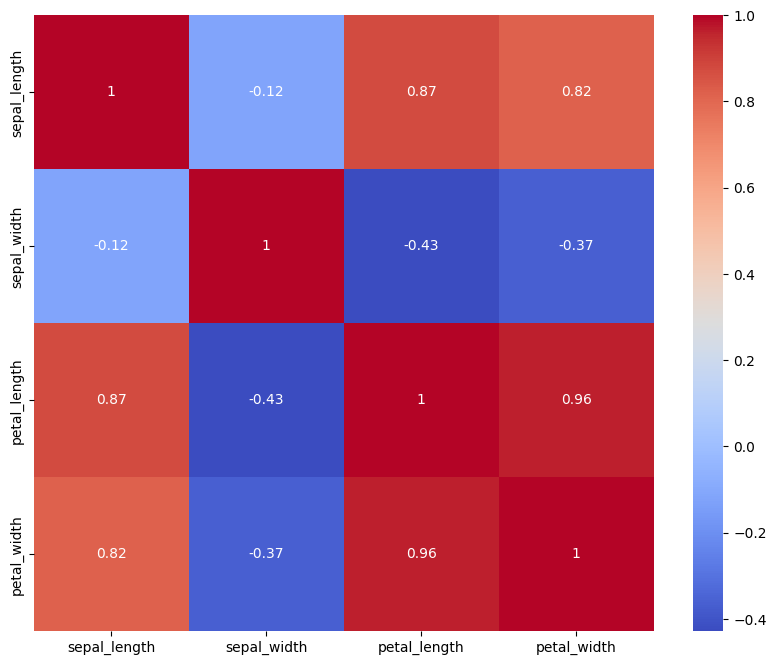

In [17]:
# --- 10. Plot correlation heatmap ---
print("\nCorrelation heatmap for Iris dataset:")
plot_correlation_heatmap(iris_df.select_dtypes(include='number'))

In [18]:
# --- 11. Filter Iris dataset ---
print("\nFiltering Iris dataset: sepal_length >= 5.0")
filtered_iris = filter_dataframe(iris_df, "sepal_length", min_value=5.0)
display(filtered_iris.head())


Filtering Iris dataset: sepal_length >= 5.0
Filtered DataFrame: 128 rows, 5 columns.


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
